In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
%matplotlib inline

In [18]:
path = '../data/cluster_means.csv'
# load accident data [lan, lon, weight]
data = np.loadtxt(path, usecols=([1,2,3]), skiprows=1, delimiter=',')

(-73.6120455, -73.5593741)

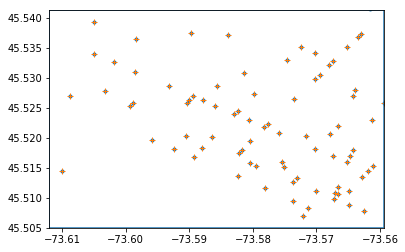

In [65]:
lat, lon, weight = data[:,0], data[:,1], data[:,2] 

ind1 = np.where(45.5049722>lat)
ind2 = index1 = np.where(lat >45.5412594)

ind3 = np.where(-73.61204552>lon)
ind4 = index1 = np.where(lon>-73.5593741)

ind  = np.unique(np.concatenate((ind1, ind2, ind3, ind4), axis=None))

lon_short = np.delete(lon,ind)
lat_short = np.delete(lat,ind)

plt.figure()
plt.plot(lon, lat, '.')
plt.plot(lon_short, lat_short, '+')

plt.axhline(y=45.5049722)
plt.axhline(y=45.5412594)
plt.axvline(x=-73.6120455)
plt.axvline(x=-73.5593741)

plt.ylim(45.5049722, 45.5412594)
plt.xlim(-73.6120455, -73.5593741)

In [67]:
def Gaussian2D(position, amp, xo, yo, sigx=0.005, sigy=0.005):
    '''
    Create a 2D Gaussian array.

    Parameters
    ----------

    position  : 3D array 
        Meshgrids of x and y indices of pixels. position[:,:,0] = x and
        position[:,:,1] = y.

    amp       : float
        Amplitude of the 2D Gaussian.

    xo        : float
        x value of the peak of the 2D Gaussian.

    yo        : float
        y value of the peak of the 2D Gaussian.

    sigx      : float
        Width of the 2D Gaussian along the x axis.

    sigy      : float
        Width of the 2D Gaussian along the y axis.

    Returns
    -------
    PSF.ravel(): 1D array
        z values of the 2D Gaussian raveled.
    '''
    centroid = [yo, xo]
    cov = [[sigy**2, 0],[0, sigx**2]]
    rv = st.multivariate_normal(mean = centroid, cov = cov)
    PSF = amp*(rv.pdf(position))
    return PSF

In [88]:
# creating the position
nx, ny = (1000, 1000)
x = np.linspace(45.5049722, 45.5412594, nx)
y = np.linspace(-73.6120455, -73.5593741, ny)
xv, yv = np.meshgrid(x, y)

position = np.dstack((xv, yv))

danger_map = np.zeros((1000, 1000))
for i in range(len(lon_short)):
#for i in range(2):
    tmp = Gaussian2D(position, weight[i], lon_short[i], 
                     lat_short[i], sigx=0.0005, sigy=0.0005)
    danger_map += tmp

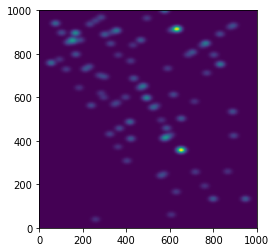

In [89]:
plt.imshow(danger_map, origin="lower", cmap='viridis')

In [69]:
lon

array([-73.55943843, -73.58578119, -73.57004554, -73.58974154,
       -73.59890606, -73.54521517, -73.5797991 , -73.58391942,
       -73.5596528 , -73.57813484, -73.54276605, -73.62469959,
       -73.60188825, -73.57022071, -73.62299312, -73.5647922 ,
       -73.56950635, -73.57511894, -73.56737094, -73.5829268 ,
       -73.62936613, -73.57818733, -73.5608289 , -73.57457938,
       -73.58054221, -73.59321397, -73.56256361, -73.58068182,
       -73.58932885, -73.58450088, -73.56110402, -73.58791003,
       -73.5809973 , -73.58487404, -73.56393418, -73.57315602,
       -73.55266017, -73.56490052, -73.57548854, -73.57245692,
       -73.57346981, -73.60997547, -73.55870245, -73.56276585,
       -73.56161893, -73.58058263, -73.59039282, -73.59849268,
       -73.58281683, -73.56658802, -73.61282371, -73.57363112,
       -73.57401335, -73.61443425, -73.58948579, -73.56482107,
       -73.61998327, -73.564294  , -73.57300467, -73.65122684,
       -73.56783252, -73.54873178, -73.56302298, -73.55

In [41]:
ind1 = np.where(45.5049722<lat)
ind2 = index1 = np.where(lat <45.5412594)
ind  = np.unique(np.concatenate((ind1, ind2), axis=None))

In [ ]:

position, amp, xo, yo, sigx, sigy